In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [136]:
#### To remove warnings from the outputs
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the cleaned homestay data
df= pd.read_csv('/content/Cleaned_df.csv')

In [3]:
df.head(1)

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_last_Review,hotspot_classification
0,0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,...,Brooklyn Heights,2,100.0,11201,1.0,1.0,12.11499,9,2850,2


# Sentiment Analysis on Textual Data:
Task: Apply advanced natural language processing techniques to the `description` texts to extract
sentiment scores. Use sentiment analysis tools to determine whether positive or negative descriptions
influence listing prices, incorporating these findings into the predictive model being trained as a feature.


To apply advanced natural language processing (NLP) techniques to the description texts and extract sentiment scores, i will follow these steps:

1. Preprocessing the text data: Tokenize the descriptions, remove stopwords, punctuation, and perform lemmatization or stemming.
2. Apply sentiment analysis: Use pre-trained sentiment analysis models or lexicons to analyze the sentiment of each description.
3. Extract sentiment scores: Calculate sentiment scores for each description, indicating the overall sentiment (positive, negative, or neutral).

In [4]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import re  # import regular expression

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatization = WordNetLemmatizer()

In [6]:
sorted_df= df.sort_values("property_type", axis=0, inplace= False)

In [7]:
sorted_df

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_last_Review,hotspot_classification
0,0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,...,Brooklyn Heights,2,100.0,11201,1.0,1.0,12.114990,9,2850,2
44316,44328,269053,4.584967,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,1.0,Real Bed,flexible,...,Fenway/Kenmore,4,70.0,2115,1.0,1.0,8.971937,11,2864,0
44317,44329,17436054,4.406719,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,flexible,...,Logan Square,42,97.0,60647,1.0,1.0,8.498289,22,2555,3
44319,44331,16619804,4.094345,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,...,Williamsburg,5,88.0,11211,1.0,1.0,7.507187,15,2441,2
44324,44336,12024903,4.553877,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Smok...",2,1.5,Real Bed,strict,...,Richmond District,33,91.0,94118,1.0,1.0,11.019849,8,3429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,28370,13004967,4.543295,Yurt,Entire home/apt,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",3,1.0,Real Bed,flexible,...,Venice,47,98.0,90291,0.0,1.0,11.293634,11,2755,0
55524,55539,13514193,5.783825,Yurt,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2,1.0,Real Bed,flexible,...,Marina,0,96.0,94123,1.0,1.0,12.783025,14,2406,4
19054,19059,8683432,5.298317,Yurt,Entire home/apt,"{""Free parking on premises"",""Pets allowed"",""In...",2,1.0,Airbed,flexible,...,Malibu,2,100.0,90265,1.0,1.0,12.076660,9,2578,2
29176,29183,6626810,4.553877,Yurt,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,...,East Flatbush,66,93.0,11203,1.0,2.0,10.959617,16,2458,0


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'log_price', 'property_type', 'room_type',
       'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_response_rate', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'Host_Tenure', 'Amenities_Count', 'Days_Since_last_Review',
       'hotspot_classification'],
      dtype='object')

In [9]:
df['description'][0]

'Beautiful, sunlit brownstone 1-bedroom in the loveliest neighborhood in Brooklyn. Blocks from the promenade and Brooklyn Bridge Park, with their stunning views of Manhattan, and from the great shopping and food.'

In [10]:
df['description'][3]

'This light-filled home-away-from-home is super clean and comes with all of the modern amenities travelers could want. Located on a quiet street in the very trendy, super central Lower Haight neighborhood. 15 minutes to Superbowl City! Avail 2/4-2/8. Tucked away on a quaint and quiet one-way street just one block away from the restaurants, shops and bars on Haight Street. There are trains and buses just a block away to get around the city. Super central and trendy!'

In [11]:
import re
from bs4 import BeautifulSoup

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

#### The tqdm library in Python stands for "progress," and it's used to create progress bars for loops and other iterative processes. When you import tqdm, you can wrap any iterable (such as a list, tuple, or range) with it, and it will display a progress bar as the loop iterates through each element.


In [13]:
from tqdm import tqdm

In [14]:
preprocessed_description=[]

for description in tqdm(df['description'].values):
  description = re.sub(r"http\S+", "", description)
  description = BeautifulSoup(description, 'lxml').get_text()
  description = re.sub('[^a-zA-z0_9]+', " ", description)
  description = ' '.join(e.lower() for e in description.split())
  preprocessed_description.append(description.strip())

  0%|          | 0/74091 [00:00<?, ?it/s]<ipython-input-14-e4e5d54c1791>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  description = BeautifulSoup(description, 'lxml').get_text()
100%|██████████| 74091/74091 [00:41<00:00, 1802.63it/s]


In [15]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize
x= sent_tokenize(preprocessed_description[0])

In [17]:
x = ' '.join(x)

In [18]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [20]:
# x= sent_tokenize(preprocessed_description[1])
# x = ' '.join(x)
# x = word_tokenize(x)
# x

In [21]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [22]:
corpus = []
for i in range(len(preprocessed_description)):
  description = preprocessed_description[i]
  description = sent_tokenize(description)
  description = ' '.join(description)
  # description = description.split()
  description = word_tokenize(description)
  description = [stemmer.stem(word) for word in description]
  description = ' '.join(description)
  corpus.append(description)

#### as we can see that we have extracted all description as preprocessed_description by removing unnecessory words, panctuation marks etc. After that we made a corpus by doing tokenization of preprocessed_description. Stemming also performed on the description text.

i am not doing removing stopwords here because i will remove stopwords just before the time of model building(TF-IDF vectorizer).

#### Applying sentiment analysis: Use pre-trained sentiment analysis models or lexicons to analyze the sentiment of each description.
#### Extracting sentiment scores: Calculate sentiment scores for each description, indicating the overall sentiment (positive, negative, or neutral).
1. VADER: it is used to calculate sentiment scores for individual descriptions using the VADER lexicon included in NLTK.

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
text= corpus[1]
sentiment_score = sia.polarity_scores(text)
print(sentiment_score)
print(type(sentiment_score))
print(sentiment_score['compound'])

{'neg': 0.036, 'neu': 0.822, 'pos': 0.142, 'compound': 0.947}
<class 'dict'>
0.947


In [25]:
# Function to calculate sentiment scores and determine overall sentiment
Sentiment_score= []
overall_sentiment = []

for i in range(len(corpus)):
  text= corpus[i]
  sentiment_score = sia.polarity_scores(text)
  Sentiment_score.append(sentiment_score['compound'])
  def get_sentiment(msg):
  # for i in range(len(corpus)):
  #   text = corpus[i]
    # get sentiment score
    # sentiment_score = sia.polarity_scores(text)
    # sentiment_score.append(sentiment_score)

    # Determine overall sentiment
    if sentiment_score['compound']>=0.10:
      return 'Positive'
    elif sentiment_score['compound']<=-0.10:
      return 'Negative'
    else:
      return 'Neutral'
  overall_sentiment.append(get_sentiment(text))







In [26]:
print(Sentiment_score)
print(overall_sentiment)

[0.296, 0.947, 0.8834, 0.8271, 0.91, 0.9417, 0.9744, 0.8225, 0.9786, -0.2883, 0.9682, 0.9496, 0.6597, 0.9694, 0.9501, 0.9839, 0.926, 0.9578, 0.994, 0.8519, 0.9694, 0.4497, 0.9201, 0.9062, -0.5927, 0.9886, 0.8934, 0.4939, 0.8779, 0.8074, 0.9062, 0.9349, 0.9371, 0.9897, 0.8176, 0.9136, 0.9839, 0.5499, 0.8176, 0.8834, 0.7876, 0.8126, 0.9349, 0.8979, 0.9042, 0.7972, 0.4646, 0.6808, 0.4118, 0.9657, 0.886, 0.2023, 0.9657, 0.0, 0.0, 0.0772, 0.6369, 0.9393, 0.4019, 0.9022, 0.8779, 0.6369, 0.6428, 0.3182, 0.0, 0.8126, 0.6124, 0.743, 0.9747, 0.9331, 0.9186, 0.5574, 0.8957, 0.9674, 0.872, 0.8591, 0.8425, 0.6249, -0.631, -0.4404, 0.924, 0.9136, 0.9673, 0.0, 0.9902, 0.9451, -0.2023, 0.9719, 0.765, 0.9575, 0.891, 0.9185, 0.9565, 0.6808, 0.2732, 0.5478, 0.7269, 0.9834, 0.9847, 0.9501, 0.9623, 0.9714, 0.9865, -0.6428, 0.802, 0.9334, 0.5267, 0.4588, -0.296, 0.8316, 0.9153, 0.961, 0.9393, 0.3919, 0.9917, 0.8801, 0.0, 0.9678, 0.9552, 0.9819, 0.743, 0.9153, 0.3612, 0.8126, 0.2263, 0.9726, 0.5647, -0.6124,

#### Incorporating sentiment features into the predictive model: i am making sentiment scores and overall sentiment as additional features in the predictive model to assess their impact on predicting listing prices.

In [27]:
# add two new columns to the dataframe
df['Sentiment_score']= Sentiment_score
df['Overall_sentiment']= overall_sentiment


In [28]:
df.head()

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,review_scores_rating,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_last_Review,hotspot_classification,Sentiment_score,Overall_sentiment
0,0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,...,100.0,11201,1.0,1.0,12.114990,9,2850,2,0.2960,Positive
1,1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,...,93.0,10019,3.0,3.0,6.882957,15,2418,3,0.9470,Positive
2,2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,...,92.0,10027,1.0,3.0,7.531828,19,2427,3,0.8834,Positive
3,3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,...,96.0,94117,2.0,2.0,9.051335,15,2406,3,0.8271,Positive
4,4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,...,40.0,20009,0.0,1.0,9.185489,12,2662,2,0.9100,Positive


# here i am saving df because it is taking time to execute some processes. and also i can use this data directly if my system crashdown. i do not have to do this all again.

In [29]:
# df.to_csv("After_sentiment_analysis.csv")

#
To thoroughly parse and analyze the amenities provided in the listings and identify which amenities are most associated with higher or lower prices, you can follow these steps:
1. Parse and preprocess amenities: Split the amenities column into individual amenities and preprocess them (e.g., remove special characters, lowercase conversion).
2. split the amenities column using the str.split() method to separate individual amenities based on the comma , delimiter.
3. then apply a lambda function to preprocess each list of amenities. Within the lambda function, we convert each amenity to lowercase, remove leading and trailing whitespaces using strip(), and remove any remaining special characters such as commas.
Finally, we print the preprocessed amenities column to verify the changes.

In [30]:
# We start with an example dataset containing the log_price and amenities columns

df_amenities= df[['amenities', 'log_price']]


In [31]:
df_amenities.head()

,amenities,log_price
0,"{""Wireless Internet"",""Air conditioning"",Kitche...",5.010635
1,"{""Wireless Internet"",""Air conditioning"",Kitche...",5.129899
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",4.976734
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6.620073
4,"{TV,Internet,""Wireless Internet"",""Air conditio...",4.744932


In [38]:
# df_amenities['amenities'] = df_amenities['amenities'].str.split(', ')
df_amenities['amenities'] = df_amenities['amenities'].apply(lambda x: [amenity.lower().strip().replace(',', '') for amenity in x])

print(df_amenities['amenities'])

0        [{"wireless internet""air conditioning"kitchen...
1        [{"wireless internet""air conditioning"kitchen...
2        [{tv"cable tv""wireless internet""air conditio...
3        [{tv"cable tv"internet"wireless internet"kitch...
4        [{tvinternet"wireless internet""air conditioni...
                               ...                        
74086                                                 [{}]
74087    [{tv"cable tv"internet"wireless internet"kitch...
74088    [{tvinternet"wireless internet""air conditioni...
74089    [{tv"wireless internet""air conditioning"kitch...
74090    [{tvinternet"wireless internet"kitchen"free pa...
Name: amenities, Length: 74091, dtype: object


<ipython-input-38-3cc3de0cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amenities['amenities'] = df_amenities['amenities'].apply(lambda x: [amenity.lower().strip().replace(',', '') for amenity in x])


# Encode amenities: One-hot encode the individual amenities to convert them into binary features.

1. initialize the MultiLabelBinarizer and then use its fit_transform() method to one-hot encode the amenities column, which returns a binary matrix where each row corresponds to an entry in the original dataset and each column corresponds to a unique amenity.
2. create a DataFrame from the one-hot encoded amenities matrix, with column names obtained from the mlb.classes_ attribute.
3. Finally, concatenate the one-hot encoded amenities DataFrame with the original DataFrame to obtain the final DataFrame with binary features representing amenities.

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

In [39]:
# initialize the Multilabelbinarizer
mlb= MultiLabelBinarizer()

# one-hot encode the emenity column
amenities_encoded= pd.DataFrame(mlb.fit_transform(df_amenities['amenities']),columns=mlb.classes_)



In [35]:
# Concatenate the one hot encoded amenities with the original Dataframe
# df_amenities= pd.concat([df_amenities, amenities_encoded], axis=1)

In [40]:
amenities_encoded.columns

Index(['smooth pathway to front door""accessible-height bed""accessible-height toilet"}',
       'smooth pathway to front door""accessible-height toilet""wide entryway"}',
       'smooth pathway to front door""disabled parking spot""step-free access""wide doorway""wide clearance to bed""accessible-height bed""step-free access"}',
       'smooth pathway to front door""disabled parking spot"}',
       'smooth pathway to front door""host greets you"}',
       'smooth pathway to front door""hot water kettle"}',
       'smooth pathway to front door""self check-in""step-free access"lockbox"step-free access""step-free access"}',
       'smooth pathway to front door""step-free access""accessible-height bed""step-free access""step-free access""handheld shower head"}',
       'smooth pathway to front door""step-free access""accessible-height bed""step-free access""wide doorway""step-free access""wide entryway"}',
       'smooth pathway to front door""step-free access""firm mattress""step-free ac

# Categorical Data Encoding:
Task: Convert categorical data into a format suitable for machine learning analysis. Apply one-hot encoding
to variables like `room_type`, `city`, and `property_type`, ensuring that the model can interpret these as
distinct features without any ordinal implication.

In [42]:
df.columns

Index(['Unnamed: 0', 'id', 'log_price', 'property_type', 'room_type',
       'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_response_rate', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'Host_Tenure', 'Amenities_Count', 'Days_Since_last_Review',
       'hotspot_classification', 'Sentiment_score', 'Overall_sentiment'],
      dtype='object')

1. One-hot encoding is typically used when the categorical variable does not have ordinal relationships between its categories. It is suitable for categorical variables where each category is independent and there is no inherent order or ranking among them.
2. Here 'room_type', 'city', 'property_type' are kind of categorical variables which does'nt have ordinal relationship. So we use OHE for these variable.
3. Apply one-hot encoding to categorical variables which are not ordinal



In [53]:
# Apply one-hot encoding to categorical variables with integer dtype
df_encoded = pd.get_dummies(df, columns=['room_type', 'city', 'property_type','bed_type'], dtype=int)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74091 entries, 0 to 74090
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              74091 non-null  int64  
 1   id                      74091 non-null  int64  
 2   log_price               74091 non-null  float64
 3   property_type           74091 non-null  object 
 4   room_type               74091 non-null  object 
 5   amenities               74091 non-null  object 
 6   accommodates            74091 non-null  int64  
 7   bathrooms               74091 non-null  float64
 8   bed_type                74091 non-null  object 
 9   cancellation_policy     74091 non-null  object 
 10  cleaning_fee            74091 non-null  bool   
 11  city                    74091 non-null  object 
 12  description             74091 non-null  object 
 13  first_review            74091 non-null  object 
 14  host_response_rate      74091 non-null

In [51]:
df_encoded.columns

Index(['Unnamed: 0', 'id', 'log_price', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'description', 'first_review', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds', 'Host_Tenure', 'Amenities_Count',
       'Days_Since_last_Review', 'hotspot_classification', 'Sentiment_score',
       'Overall_sentiment', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'city_Boston',
       'city_Chicago', 'city_DC', 'city_LA', 'city_NYC', 'city_SF',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Casa particular',
       'property_type_Castle', 'property_ty

1. We can see here because of one hot encoding dimensionality of the dataset increases.
2. Till now i have encoded those categorical features only in which there is no any ordinal relationship between categories.
3. For those features whose categories have ordinal relationship i will use label encoding.
4. After label encoding i will drop all the features whose are encoded or whose doesn't have any impact on log_price. And also i will drop features which is personal information of the user because in model building no need of personal information.
5. After this the entire dataset i will use PCA to find relevent features.

In [57]:
df_encoded.columns

Index(['Unnamed: 0', 'id', 'log_price', 'amenities', 'accommodates',
       'bathrooms', 'cancellation_policy', 'cleaning_fee', 'description',
       'first_review', 'host_response_rate', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'Host_Tenure', 'Amenities_Count', 'Days_Since_last_Review',
       'hotspot_classification', 'Sentiment_score', 'Overall_sentiment',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'p

In [59]:
# label encoding of cancellation policy

# from sklearn.preprocessing import LabelEncoder
# label_encoder= LabelEncoder()

# df_encoded['cancellation_policy'] = label_encoder.fit_transform (df_encoded['cancellation_policy'])
# another method
df_encoded.cancellation_policy= df_encoded.cancellation_policy.map({'flexible':1,
                                                                    'moderate':2,
                                                                    'strict':3,
                                                                    'super_strict_30':4,
                                                                    'super_strict_60':5})
df_encoded.instant_bookable= df_encoded.instant_bookable.map({'t':1,
                                                              'f':0})
df_encoded['cleaning_fee']= df_encoded['cleaning_fee'].astype(int)

In [60]:
df_encoded['cancellation_policy'].unique()

array([3, 2, 1, 4, 5])

In [61]:
df_encoded['cleaning_fee'].unique()

array([1, 0])

In [62]:
df_encoded['instant_bookable'].unique()

array([0, 1])

In [64]:
# label encoding of zipcode

from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

df_encoded['zipcode'] = label_encoder.fit_transform (df_encoded['zipcode'])


In [66]:
df_encoded['Overall_sentiment'] = label_encoder.fit_transform(df_encoded['Overall_sentiment'])

In [67]:
df_encoded['Overall_sentiment'].unique()

array([2, 0, 1])

1. drop some columns from which info converted to relevent columns and personal info of user
2. example: 'description', 'aminities', 'first_review', 'host_since','last_review','latitude','longitude','name','neighbourhood','no of reviews', 'Days_since_last_review'

In [72]:
df_encoded.drop(columns=['description', 'amenities', 'first_review',
                 'host_since','last_review','latitude',
                 'longitude','name','neighbourhood',
                 'Days_Since_last_Review'], inplace= True)

In [74]:
df_encoded.shape

(74091, 68)

In [75]:
df_encoded.drop(columns=['id'], inplace= True)

In [76]:
df_encoded.shape

(74091, 67)

In [79]:
df_encoded.head()

,Unnamed: 0,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,5.010635,3,1.0,3,1,1.0,0,2,100.0,...,0,0,0,0,0,0,0,0,0,1
1,1,5.129899,7,1.0,3,1,1.0,1,6,93.0,...,0,0,0,0,0,0,0,0,0,1
2,2,4.976734,5,1.0,2,1,1.0,1,10,92.0,...,0,0,0,0,0,0,0,0,0,1
3,3,6.620073,4,1.0,1,1,1.0,0,0,96.0,...,0,0,0,0,0,0,0,0,0,1
4,4,4.744932,2,1.0,2,1,1.0,1,4,40.0,...,0,0,0,0,0,0,0,0,0,1


# Now we apply PCA for feature engineering.

# we can also directly use this dat for model building. but i am doing first PCA analysis then i will go for model building.

In [80]:
# df_encoded.to_csv('df_encoded.csv')

In [82]:
df_pca= df_encoded
df_pca.columns

Index(['Unnamed: 0', 'log_price', 'accommodates', 'bathrooms',
       'cancellation_policy', 'cleaning_fee', 'host_response_rate',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'zipcode', 'bedrooms', 'beds', 'Host_Tenure', 'Amenities_Count',
       'hotspot_classification', 'Sentiment_score', 'Overall_sentiment',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'city_Boston', 'city_Chicago', 'city_DC',
       'city_LA', 'city_NYC', 'city_SF', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Gu

In [84]:
df_pca.drop(columns= ['Unnamed: 0'], inplace = True)

In [89]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74091 entries, 0 to 74090
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   log_price                         74091 non-null  float64
 1   accommodates                      74091 non-null  int64  
 2   bathrooms                         74091 non-null  float64
 3   cancellation_policy               74091 non-null  int64  
 4   cleaning_fee                      74091 non-null  int64  
 5   host_response_rate                74091 non-null  float64
 6   instant_bookable                  74091 non-null  int64  
 7   number_of_reviews                 74091 non-null  int64  
 8   review_scores_rating              74091 non-null  float64
 9   zipcode                           74091 non-null  int64  
 10  bedrooms                          74091 non-null  float64
 11  beds                              74091 non-null  float64
 12  Host

In [90]:
from sklearn.decomposition import PCA
# prepare x and y
Y= df_pca['log_price']
X= df_pca.drop(columns=['log_price'], axis=1)

print(df.shape)
df_pca.head()


(74091, 33)


,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,zipcode,...,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,5.010635,3,1.0,3,1,1.0,0,2,100.0,106,...,0,0,0,0,0,0,0,0,0,1
1,5.129899,7,1.0,3,1,1.0,1,6,93.0,20,...,0,0,0,0,0,0,0,0,0,1
2,4.976734,5,1.0,2,1,1.0,1,10,92.0,27,...,0,0,0,0,0,0,0,0,0,1
3,6.620073,4,1.0,1,1,1.0,0,0,96.0,651,...,0,0,0,0,0,0,0,0,0,1
4,4.744932,2,1.0,2,1,1.0,1,4,40.0,211,...,0,0,0,0,0,0,0,0,0,1


In [92]:
X.head()

,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,...,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,3,1.0,3,1,1.0,0,2,100.0,106,1.0,...,0,0,0,0,0,0,0,0,0,1
1,7,1.0,3,1,1.0,1,6,93.0,20,3.0,...,0,0,0,0,0,0,0,0,0,1
2,5,1.0,2,1,1.0,1,10,92.0,27,1.0,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,1,1,1.0,0,0,96.0,651,2.0,...,0,0,0,0,0,0,0,0,0,1
4,2,1.0,2,1,1.0,1,4,40.0,211,0.0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
pca= PCA(n_components= 20)
df_pca_1= pca.fit_transform(X=X)
type(df_pca_1)
# why transform?- in PCA we take the original dataset, we chang the values
# to Z, we convert it to varience and then we find totally different dataset
# out of it. so we ask the machine to work on the exact datset do mathematical
# calculations on the dataset and change it completely. That is where transforms comes.

numpy.ndarray

In [94]:
df_pca_1

array([[-1.59322283e+02, -1.74052551e+01,  4.59772278e-01, ...,
        -1.55306884e-01, -2.63268909e-02, -1.95515682e-03],
       [-2.45257150e+02, -1.22556297e+01,  1.38321519e+00, ...,
        -2.02710306e-01, -8.52351025e-03, -5.89610806e-02],
       [-2.38203800e+02, -8.19937290e+00, -1.98427247e-01, ...,
        -2.22623320e-01, -6.99213350e-02,  2.20362677e-02],
       ...,
       [-1.54799543e+02,  2.42839178e+01, -8.50475256e+00, ...,
        -3.05796518e-01, -6.32374692e-02, -7.51306697e-02],
       [-2.52324007e+02, -1.82000831e+01, -7.33578279e-01, ...,
        -1.95441667e-01, -9.06420291e-02,  5.63009600e-02],
       [ 2.24920502e+02,  1.81508220e+02,  2.65989651e+00, ...,
        -2.99158024e-01,  4.68276939e-01, -1.99729367e-01]])

In [95]:
# store as dataframe and print
df_pca_final= pd.DataFrame(df_pca_1)
print(df_pca_final.shape)
df_pca_final.round(2).head()

(74091, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-159.32,-17.41,0.46,-9.37,0.83,2.40,0.16,-1.20,-0.54,0.02,0.18,-0.24,0.11,-0.11,0.01,0.04,0.17,-0.16,-0.03,-0.00
1,-245.26,-12.26,1.38,0.27,4.80,-2.63,-1.33,-0.89,-0.17,-0.45,-0.19,-0.03,0.65,-0.45,0.78,-0.51,-0.32,-0.20,-0.01,-0.06
2,-238.20,-8.20,-0.20,3.56,2.09,-2.00,-1.35,-0.01,-0.47,0.57,-0.43,0.55,-0.35,0.06,0.52,-0.13,0.27,-0.22,-0.07,0.02
3,385.64,-25.29,1.50,-2.74,1.03,-0.43,-0.98,0.81,-0.25,-0.06,-0.27,-0.37,0.09,-1.29,0.24,0.30,0.56,-0.19,-0.21,0.03
4,-54.41,-16.21,44.72,31.46,-2.05,0.13,-0.95,-0.04,-0.86,0.39,-0.48,-0.29,-0.51,0.31,0.59,0.26,0.33,0.94,-0.29,-0.41


#### The first column is the first PC and so on. This dataframe(df_pca) has the same rows as the data X.
##### Percentage of variance Explained with each PC
* The PCs are usually arrange in descending order of the variance(information) explained. To see how much of the
   total information is control by each PC, look at the explained_variance_ratio_attribute.
    


In [96]:
# variance associated to each pc is obtained
v= pca.explained_variance_
v

array([4.05755134e+04, 1.42829948e+03, 5.17638261e+01, 4.29385824e+01,
       5.87801119e+00, 3.29179733e+00, 1.95681337e+00, 6.69621007e-01,
       5.33842400e-01, 3.68862167e-01, 3.47834460e-01, 2.75118733e-01,
       2.62906125e-01, 1.84226528e-01, 1.79263973e-01, 1.65297332e-01,
       1.53408680e-01, 1.13894659e-01, 6.78712918e-02, 5.69081249e-02])

In [100]:
# This returns the ratio of variance to total variance of the data for each PC
print(pca.explained_variance_ratio_.round(4))

[9.635e-01 3.390e-02 1.200e-03 1.000e-03 1.000e-04 1.000e-04 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


In [103]:
# Getting a batter picture of commulative variance explained by the 20 PCs
variances=pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage=(variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,21)
final=[r,variances[0], percentage[0], var[0]]
final
df_1=pd.DataFrame(data=final)
df1=df_1.T
columns=['PC#','Variance','Percentage','Cummulative var']
df1.columns=columns
df1

,PC#,Variance,Percentage,Cummulative var
0,1.0,0.9635,96.35,96.35
1,2.0,0.0339,3.39,99.74
2,3.0,0.0012,0.12,99.86
3,4.0,0.0010,0.10,99.96
4,5.0,0.0001,0.01,99.97
5,6.0,0.0001,0.01,99.98
6,7.0,0.0000,0.00,99.98
7,8.0,0.0000,0.00,99.98
8,9.0,0.0000,0.00,99.98
9,10.0,0.0000,0.00,99.98


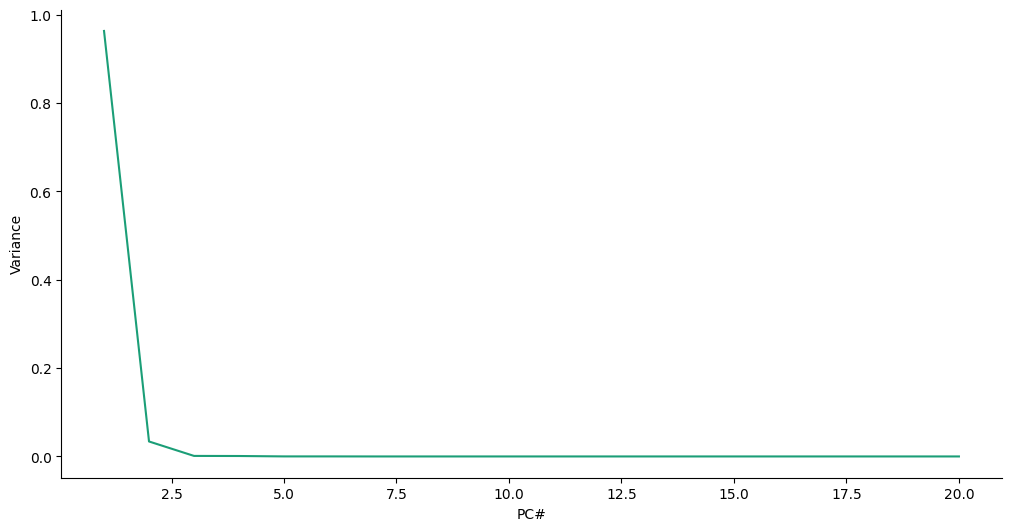

In [105]:
# @title PC# vs Variance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PC#']
  ys = series['Variance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('PC#', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PC#')
_ = plt.ylabel('Variance')

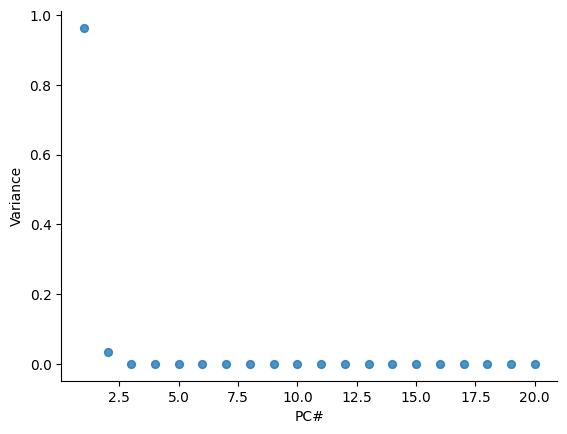

In [104]:
# @title PC# vs Variance

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='PC#', y='Variance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

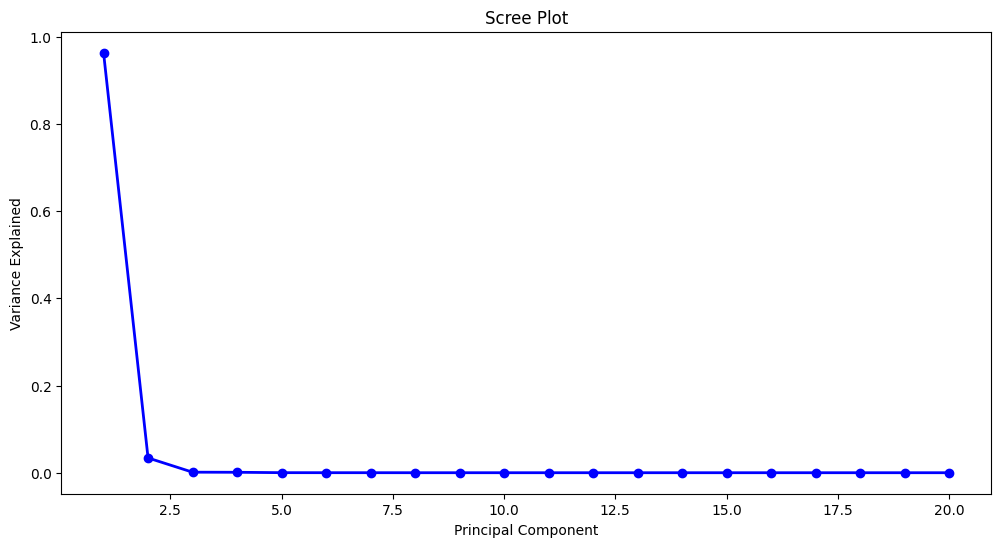

In [106]:
# Plotting the scree plot
plt.figure(figsize=(12,6))
PC_values=np.arange(pca.n_components_)+1
plt.plot(PC_values, pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

We can see here keeping the only 6 component will give all information about the dataset.

In [108]:
# so again i am applying PCA by keeping the components= 6
pca= PCA(n_components=6)
df_pca_2= pca.fit_transform(X=X)

# store_dataframe and print
df1_pca= pd.DataFrame(df_pca_2)
df_pca_2.round(2).shape

(74091, 6)

In [109]:
variances=pca.explained_variance_ratio_.round(4).reshape(1,-1)
percentage=(variances*100).reshape(1,-1)
var=np.cumsum(np.round(variances, decimals=4)*100).reshape(1,-1)
r=np.arange(1,7)
final=[r,variances[0], percentage[0], var[0]]
final
df_2=pd.DataFrame(data=final)
df1=df_2.T
columns=['PC#','Variance','Percentage','Cummulative var']
df1.columns=columns
df1

,PC#,Variance,Percentage,Cummulative var
0,1.0,0.9635,96.35,96.35
1,2.0,0.0339,3.39,99.74
2,3.0,0.0012,0.12,99.86
3,4.0,0.0010,0.10,99.96
4,5.0,0.0001,0.01,99.97
5,6.0,0.0001,0.01,99.98


In [111]:
df1_pca

,0,1,2,3,4,5
0,-159.322283,-17.405255,0.459772,-9.368605,0.829226,2.398210
1,-245.257150,-12.255630,1.383215,0.266924,4.799264,-2.631041
2,-238.203800,-8.199373,-0.198427,3.559916,2.092620,-2.000998
3,385.636273,-25.291948,1.498006,-2.740978,1.028106,-0.429597
4,-54.410446,-16.211798,44.718870,31.458081,-2.050721,0.134606
...,...,...,...,...,...,...
74086,-155.384094,-19.721711,8.822494,-13.020011,-0.487333,0.868933
74087,160.827625,-6.754155,2.542384,-0.065580,2.089804,-1.597871
74088,-154.799543,24.283918,-8.504753,10.148580,0.475709,2.189478
74089,-252.324007,-18.200083,-0.733578,-2.018599,-0.500657,-2.712599


In [112]:
df1_pca['log_price']=Y
df1_pca

,0,1,2,3,4,5,log_price
0,-159.322283,-17.405255,0.459772,-9.368605,0.829226,2.398210,5.010635
1,-245.257150,-12.255630,1.383215,0.266924,4.799264,-2.631041,5.129899
2,-238.203800,-8.199373,-0.198427,3.559916,2.092620,-2.000998,4.976734
3,385.636273,-25.291948,1.498006,-2.740978,1.028106,-0.429597,6.620073
4,-54.410446,-16.211798,44.718870,31.458081,-2.050721,0.134606,4.744932
...,...,...,...,...,...,...,...
74086,-155.384094,-19.721711,8.822494,-13.020011,-0.487333,0.868933,4.605170
74087,160.827625,-6.754155,2.542384,-0.065580,2.089804,-1.597871,5.043425
74088,-154.799543,24.283918,-8.504753,10.148580,0.475709,2.189478,5.220356
74089,-252.324007,-18.200083,-0.733578,-2.018599,-0.500657,-2.712599,5.273000


In [114]:
df1_pca.shape

(74091, 7)

In [115]:
# df1_pca.to_csv('after_pca.csv')

In [119]:
# we can see here whatever we considered, no information is lost
pca= PCA(0.9998)

x_pca= pca.fit_transform(X)
x_pca.shape

(74091, 6)

#

In [120]:
x= df1_pca.drop(columns=['log_price'], axis=1)
y= df1_pca['log_price']

In [138]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state= 101)



In [139]:
# initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'SVM': SVR(),
    'K_Nearest_Neighbours': KNeighborsRegressor()
}

In [140]:
# Train and evaluate models
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred= model.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)

  print(f'{name} MSE:', mse)


Linear Regression MSE: 0.3148751807150969
Random Forest Regressor MSE: 0.23004861338914526
Gradient Boosting Regressor MSE: 0.23292776143067537
SVM MSE: 0.2685215012676819
K_Nearest_Neighbours MSE: 0.29878612280424893


####  By seeing the mse of different models. i will furter go with the linear regression model for now. Because i have time constrain os submitting the assignment today only. I will complete it again without using PCA too. And with different models with hypertuning also. I will go with advance regression models later.

In [141]:
from sklearn.model_selection import GridSearchCV, KFold

In [167]:
# Define the parameter grid for Linear Regression hyperparameter tuning
param_grid_lr = {
    'fit_intercept': [True, False],   # Whether to calculate the intercept for this model

    'copy_X': [True, False],            # Whether to copy the input data before fitting the model
    'positive': [True, False],          # Whether to force coefficients to be positive
    'n_jobs': [None, -1]                # Number of jobs to use for the computation
}

In [168]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

In [169]:
# Perform grid search with cross-validation for Linear Regression
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=10, scoring='neg_mean_squared_error')


In [170]:
# Fit the grid search model to the data
grid_search_lr.fit(x, y)


GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [171]:
# Get the best hyperparameters and the corresponding mean cross-validated score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

In [173]:
print("Best Hyperparameters for Linear Regression:", best_params_lr)
print("Best Mean Cross-Validated Score for Linear Regression:", -best_score_lr)

Best Hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best Mean Cross-Validated Score for Linear Regression: 0.31836498798568946


In [174]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=101)

In [175]:
# Initialize Linear Regression model with best hyperparameters
best_lr_model = LinearRegression(**best_params_lr)

In [177]:
# Fit the model to the training data
best_lr_model.fit(x_train, y_train)

LinearRegression()

In [178]:
# Predict the target variable on the test set
y_pred = best_lr_model.predict(x_test)

In [179]:
# Calculate mean squared error (MSE) on the test set
mse_lr = mean_squared_error(y_test, y_pred)

In [180]:
print(mse_lr)

0.3148751807150969


In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [182]:

# Define custom scoring function for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize Linear Regression model with best hyperparameters
best_lr_model = LinearRegression(**best_params_lr)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_lr_model, X, y, cv=5, scoring=mse_scorer)

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

In [183]:
print("Mean Cross-Validated Mean Squared Error (MSE) for Linear Regression:", mean_cv_score)
print("Standard Deviation of Cross-Validated MSE for Linear Regression:", std_cv_score)


Mean Cross-Validated Mean Squared Error (MSE) for Linear Regression: 0.1887574725455537
Standard Deviation of Cross-Validated MSE for Linear Regression: 0.0023068340922764046


As we can see that Linear regression model is not that much efficient. Even after hyperparameter tuning. For it is best to go with other advance regression methods. I will also work on that but not right now. I have to submit this assignment today only.

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=101)

In [187]:
# Fit the model to the training data
best_lr_model= best_lr_model.fit(X_train, Y_train)

In [188]:
# Get the coefficients of the Linear Regression model
coefficients_lr = best_lr_model.coef_



In [189]:
# Create a DataFrame to display feature importance (coefficients)
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients_lr})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)
print(feature_importance_lr)

                          Feature  Importance
49    property_type_Parking Space    0.854631
24                        city_SF    0.523150
16      room_type_Entire home/apt    0.479220
32  property_type_Casa particular    0.430342
46       property_type_Lighthouse    0.428522
..                            ...         ...
51             property_type_Tent   -0.422492
18          room_type_Shared room   -0.431252
43              property_type_Hut   -0.517204
37             property_type_Dorm   -0.566078
41           property_type_Hostel   -0.749476

[65 rows x 2 columns]


In [191]:
df_important_feature= pd.DataFrame(feature_importance_lr)

In [192]:
df_important_feature.head(10)

,Feature,Importance
49,property_type_Parking Space,0.854631
24,city_SF,0.523150
16,room_type_Entire home/apt,0.479220
32,property_type_Casa particular,0.430342
46,property_type_Lighthouse,0.428522
53,property_type_Tipi,0.384635
45,property_type_Island,0.382055
38,property_type_Earth House,0.375595
52,property_type_Timeshare,0.250917
28,property_type_Boutique hotel,0.207093


In [193]:
#df_important_feature.to_csv('feature_importance.csv')

# Performence Evaluation

In [202]:
model= LinearRegression(**best_params_lr)

In [204]:
final_model= model.fit(x_train, y_train)

In [205]:
y_pred_test= final_model.predict(x_test)

In [206]:
rmse= np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

In [207]:
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)
print("R-squared on Test Set:", r2)

Root Mean Squared Error (RMSE) on Test Set: 0.5611373991413305
R-squared on Test Set: 0.38497981996841624


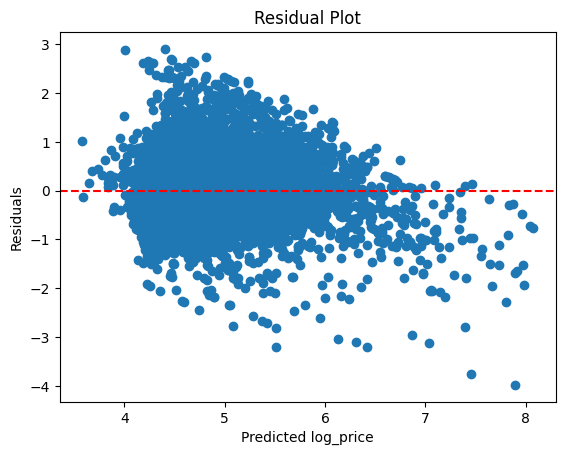

In [212]:
# Analyze residuals
residuals = y_test - y_pred_test

# Plot residuals against predicted values
plt.scatter(y_pred_test, residuals)
plt.xlabel("Predicted log_price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



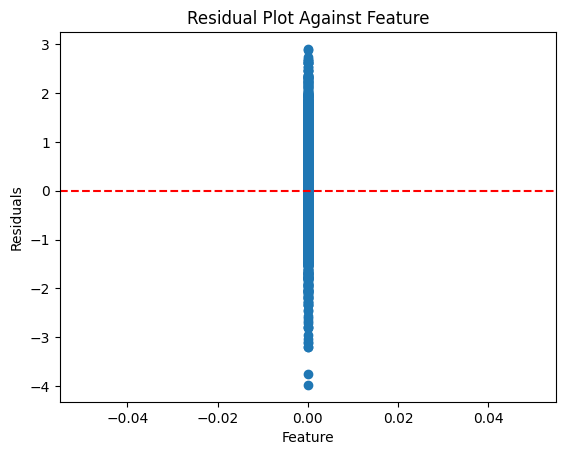

In [214]:
# Alternatively, you can plot residuals against specific features to check for patterns
# For example:
plt.scatter(X_test['property_type_Parking Space'], residuals)
plt.xlabel("Feature")
plt.ylabel("Residuals")
plt.title("Residual Plot Against Feature")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [208]:
# BY the dataset- before PCA Dataset
final_model_1= model.fit(X_train, Y_train)

In [209]:
Y_pred_test= final_model.predict(X_test)

In [210]:
rmse_1= np.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2_1 = r2_score(Y_test, Y_pred_test)

In [211]:
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_1)
print("R-squared on Test Set:", r2_1)

Root Mean Squared Error (RMSE) on Test Set: 0.4346824681087742
R-squared on Test Set: 0.6309415232419788


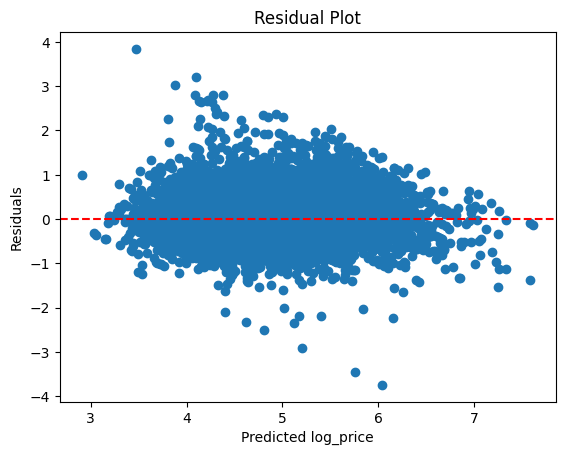

In [215]:
# Analyze residuals
residuals_1 = Y_test - Y_pred_test

# Plot residuals against predicted values
plt.scatter(Y_pred_test, residuals_1)
plt.xlabel("Predicted log_price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

1. predicted the target variable (log_price) for the test set using the final trained model (best_lr_model).
Also calculated RMSE and R-squared to evaluate the model's performance on the test set.
2. analyzed the residuals by computing the differences between the actual and predicted values and then plotting them against the predicted values or specific features.
3. Analyzed the residuals helps us identify any systematic errors or patterns in the model predictions, which can provide insights into potential model biases or misfit.